# Speed up your Pandas code!

In [1]:
import pandas as pd
import numpy as np

## Create our dataset

In [5]:
def get_data(size = 10_000):
    df = pd.DataFrame()
    df['age'] = np.random.randint(0, 100, size)
    df['time_in_bed'] = np.random.randint(0, 9, size)
    df['pct_sleeping'] = np.random.rand(size)
    df['favourite_food'] = np.random.choice(['pizza', 'taco', 'ice-cream'], size)
    df['hate_food'] = np.random.choice(['broccoli', 'candy-corn', 'eggs'], size)
    return df

### The Problem
Reward calculation:
- If they were in bed for more than 5 hours and they were sleeping more than 50% we give them their favourite food.
- Otherwise we give them their hate food.
- If they are over 90 years old give their favourite food regardless.

In [12]:
def reward_calc(row):
    if row['age'] >= 90:
        return row['favourite_food']
    if (row['time_in_bed'] > 5) & (row['pct_sleeping'] > 0.5):
        return row['favourite_food']
    return row['hate_food']

## Level 1 - Loop

In [13]:
df = get_data()

In [14]:
%%timeit

for index, row in df.iterrows():
    df.loc[index, 'reward'] = reward_calc(row)

1.13 s ± 8.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Level 2 - Apply

In [15]:
df = get_data()

In [16]:
%%timeit

df.apply(reward_calc, axis=1)

146 ms ± 4.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Level 3 - Vectorized

In [28]:
df = get_data()

In [30]:
%%timeit

df['reward'] = df['hate_food']
df.loc[((df['pct_sleeping'] > 0.5) & (df['time_in_bed'] > 5)) | (df['age'] > 90), 'reward'] = df['favourite_food']

1.2 ms ± 44.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Plot Differences

In [35]:
results = pd.DataFrame(
    [
        ["loop", 1130, 8.48],
        ["apply", 146, 4.16],
        ["vectorized", 1.2, 44.1],
    ],
    columns=["type", "mean", "std"]
)

<AxesSubplot:title={'center':'Time to Run Reward Calc'}, xlabel='type'>

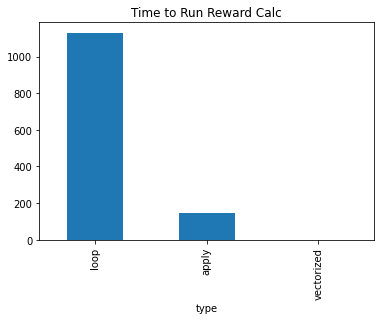

In [37]:
results.set_index('type')['mean'].plot(kind='bar', title='Time to Run Reward Calc')